In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

DATA_RAW = "../data/togo-dapaong_qc.csv"
DATA_CLEAN = "../data/clean/togo_clean.csv"

In [2]:
print("cwd:", os.getcwd())
print("data exists?:", os.path.exists(DATA_RAW))
df = pd.read_csv(DATA_RAW, parse_dates=["Timestamp"])
df.head()

cwd: /Users/mac/Documents/solarweek0/notebooks
data exists?: True


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
df.info()
display(df.describe(include='all').T) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


In [4]:

missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
missing_report = missing_report.sort_values("missing_pct", ascending=False)
missing_report


,missing_count,missing_pct
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [5]:
cols_over_5pct = missing_report[missing_report["missing_pct"] > 5].index.tolist()
cols_over_5pct, len(cols_over_5pct)


(['Comments'], 1)

In [6]:
numeric_cols = ["GHI","DNI","DHI","ModA","ModB","Tamb","TModA","TModB","RH","WS","WSgust","WSstdev","BP","Precipitation"]
numeric_cols = [c for c in numeric_cols if c in df.columns]
numeric_cols

['GHI',
 'DNI',
 'DHI',
 'ModA',
 'ModB',
 'Tamb',
 'TModA',
 'TModB',
 'RH',
 'WS',
 'WSgust',
 'WSstdev',
 'BP',
 'Precipitation']

In [7]:
from scipy.stats import zscore

z_df = df[numeric_cols].copy()
z_df = z_df.fillna(z_df.median())
z_scores = np.abs(zscore(z_df, nan_policy='omit'))
z_scores = pd.DataFrame(z_scores, columns=numeric_cols, index=df.index)

outlier_mask = (z_scores > 3).any(axis=1)
outlier_count = outlier_mask.sum()
print("Outlier rows flagged:", outlier_count)
df.loc[outlier_mask, numeric_cols].head(10)

Outlier rows flagged: 16813


,GHI,DNI,DHI,ModA,ModB,Tamb,TModA,TModB,RH,WS,WSgust,WSstdev,BP,Precipitation
2122,977.0,746.6,324.7,1011.0,997.0,31.9,57.5,64.3,62.7,4.4,7.2,1.4,977,0.0
2238,851.0,729.7,259.9,888.0,879.0,32.7,51.8,52.9,57.9,2.4,4.9,1.5,976,0.0
4921,863.0,771.0,252.4,892.0,876.0,29.6,50.4,59.0,72.1,4.1,5.9,1.5,978,0.0
4985,1139.0,805.1,466.1,1172.0,1154.0,29.8,44.7,50.2,70.8,2.2,2.6,0.4,977,0.0
5177,691.1,598.4,284.6,720.1,709.0,32.4,49.5,50.0,58.3,2.5,4.4,1.4,974,0.0
5410,-1.2,0.0,0.0,0.0,0.0,29.7,30.0,29.5,63.5,6.6,9.7,1.6,976,0.0
5411,-1.0,0.0,0.0,0.0,0.0,29.3,29.9,29.5,62.4,6.9,8.9,1.2,976,0.0
5413,-0.8,0.0,0.0,0.0,0.0,28.6,29.5,29.2,63.7,7.1,8.9,1.1,976,0.0
5420,-1.3,0.0,0.0,0.0,0.0,27.7,28.4,28.2,64.5,6.1,8.9,1.3,977,0.0
5425,-1.3,0.0,0.0,0.0,0.0,27.3,28.0,27.7,65.0,6.9,10.0,1.6,976,0.0


In [8]:
outlier_counts_per_col = (z_scores > 3).sum().sort_values(ascending=False)
outlier_counts_per_col[outlier_counts_per_col > 0]

WSstdev          5753
WSgust           3915
WS               3510
DHI              3415
Precipitation    3338
DNI              1062
BP               1019
TModB             609
GHI               305
ModB              206
TModA             153
ModA              137
dtype: int64

In [9]:
clean = df.copy()
clean["_is_outlier"] = outlier_mask

impute_cols = [c for c in ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"] if c in clean.columns]
for c in impute_cols:
    med = clean[c].median()
    clean[c] = clean[c].fillna(med)
clean_info = pd.DataFrame({
    "before_rows": len(df),
    "after_rows": len(clean),
    "outlier_rows_flagged": outlier_count
}, index=["counts"])
clean_info

,before_rows,after_rows,outlier_rows_flagged
counts,525600,525600,16813


In [10]:
clean.to_csv(DATA_CLEAN, index=False)
print("Cleaned data exported to:", DATA_CLEAN)


Cleaned data exported to: ../data/clean/togo_clean.csv


In [11]:
clean["Timestamp"] = pd.to_datetime(clean["Timestamp"], errors="coerce")
clean = clean.sort_values("Timestamp").reset_index(drop=True)
clean["date"] = clean["Timestamp"].dt.date
clean["month"] = clean["Timestamp"].dt.to_period("M")
clean["hour"] = clean["Timestamp"].dt.hour

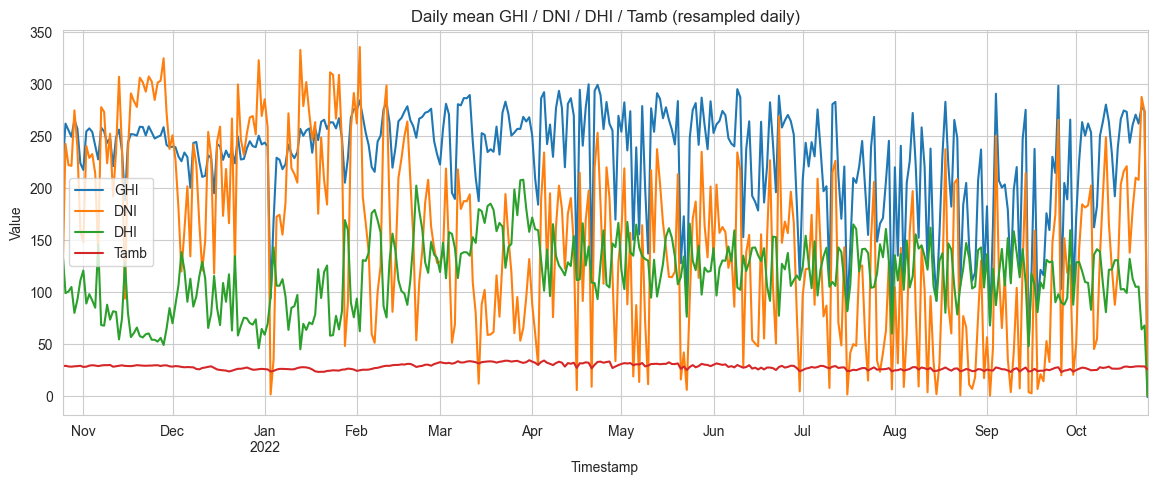

In [12]:
if "GHI" in clean.columns:
    numeric_cols = [col for col in ["GHI","DNI","DHI","Tamb"] if col in clean.columns]
    
    daily = clean.set_index("Timestamp")[numeric_cols].resample("D").mean()
    
    daily.plot(subplots=False, figsize=(14,5))
    plt.title("Daily mean GHI / DNI / DHI / Tamb (resampled daily)")
    plt.ylabel("Value")
    plt.show()
else:
    print("GHI column not present.")

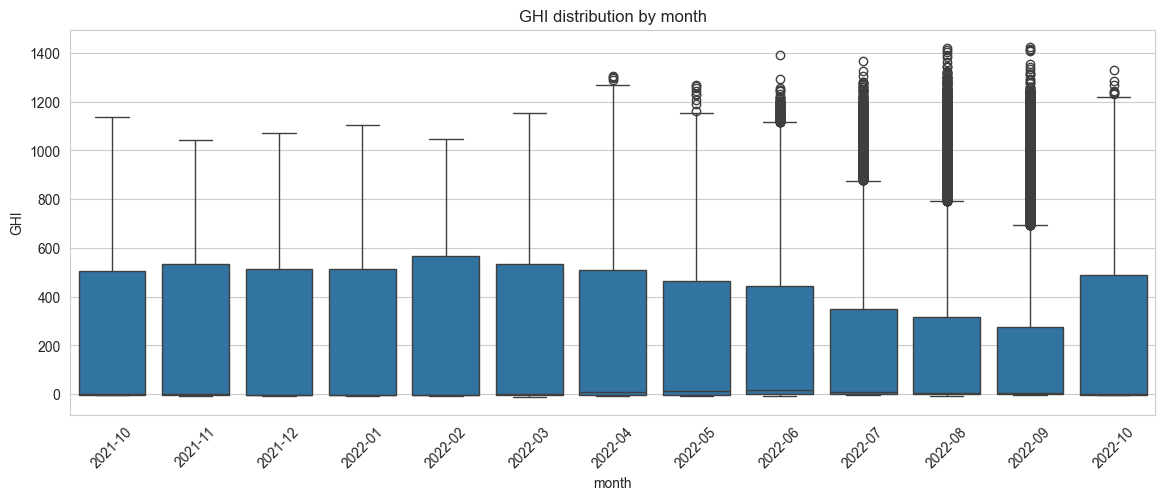

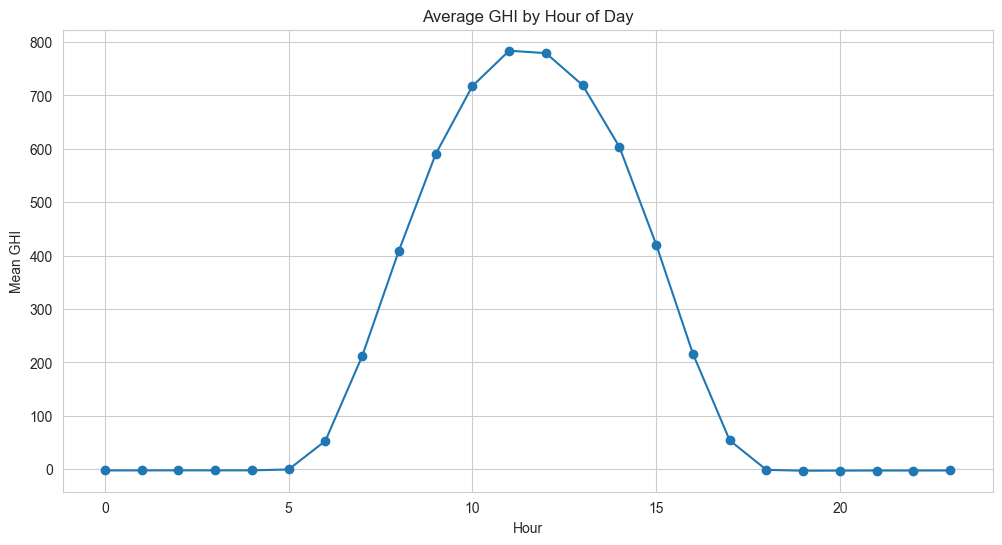

In [13]:
if "GHI" in clean.columns:
    plt.figure(figsize=(14,5))
    sns.boxplot(x=clean["month"].astype(str), y=clean["GHI"])
    plt.xticks(rotation=45)
    plt.title("GHI distribution by month")
    plt.show()

    # hourly mean profile
    hourly = clean.groupby("hour")["GHI"].mean()
    hourly.plot(kind="line", marker="o")
    plt.title("Average GHI by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Mean GHI")
    plt.show()

,ModA,ModB
Cleaning,,
0,225.979064,219.401351
1,535.186477,532.211744


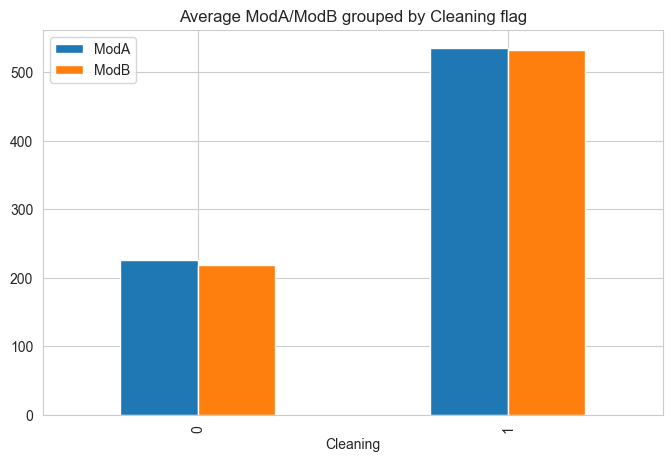

In [14]:
if "Cleaning" in clean.columns and "ModA" in clean.columns and "ModB" in clean.columns:
    grp = clean.groupby("Cleaning")[["ModA","ModB"]].mean()
    display(grp)
    grp.plot(kind="bar", figsize=(8,5), title="Average ModA/ModB grouped by Cleaning flag")
    plt.show()
else:
    print("Cleaning/ModA/ModB column(s) not present in data.")

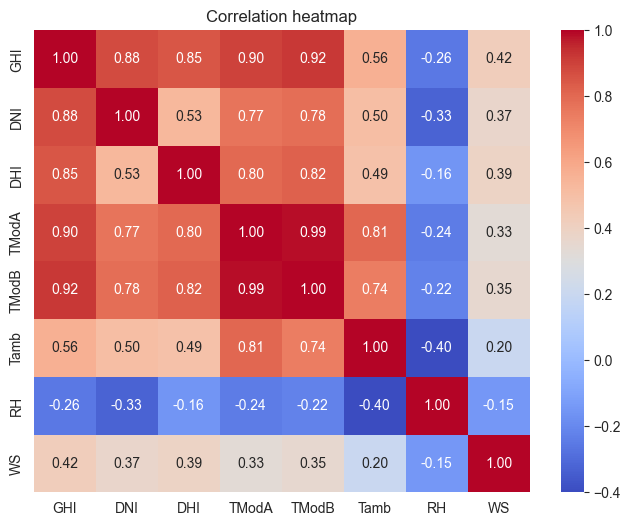

In [15]:
corr_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","WS"] if c in clean.columns]
plt.figure(figsize=(8,6))
sns.heatmap(clean[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

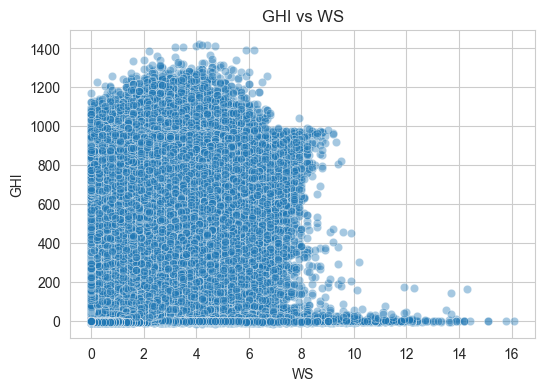

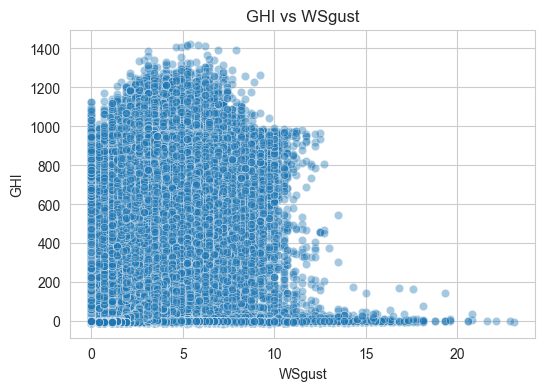

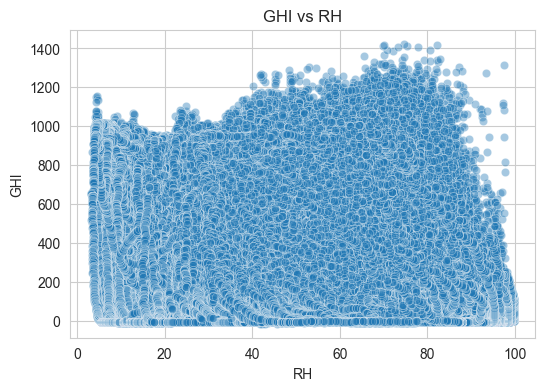

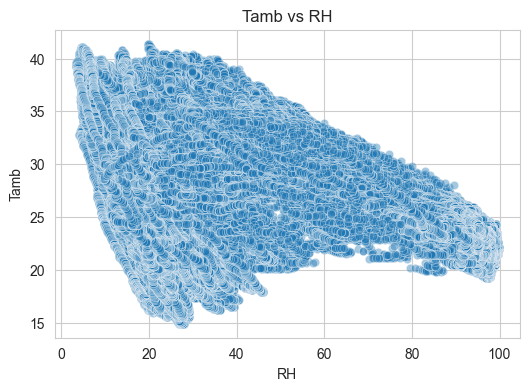

In [16]:
pairs = [("WS","GHI"), ("WSgust","GHI"), ("RH","GHI"), ("RH","Tamb")]
for x,y in pairs:
    if x in clean.columns and y in clean.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=clean, x=x, y=y, alpha=0.4)
        plt.title(f"{y} vs {x}")
        plt.show()

/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_23306/2777011818.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rose = df_wind.groupby("wd_sector")["WS"].mean().fillna(0)


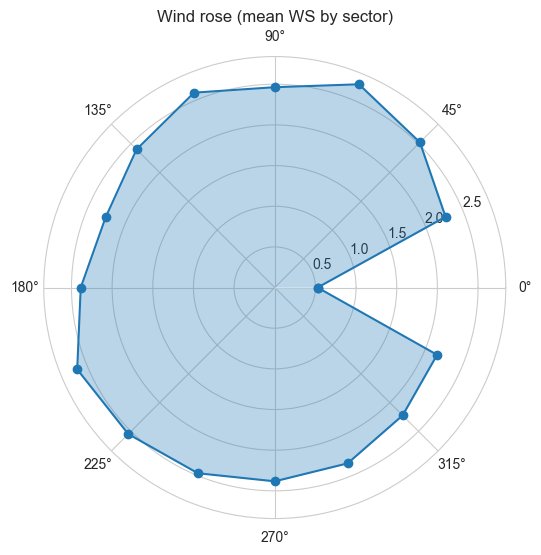

In [17]:
if "WS" in clean.columns and "WD" in clean.columns:
    df_wind = clean.dropna(subset=["WS","WD"])
    sectors = 16
    df_wind["wd_sector"] = pd.cut(df_wind["WD"], bins=np.linspace(0,360,sectors+1), include_lowest=True)
    rose = df_wind.groupby("wd_sector")["WS"].mean().fillna(0)
    angles = np.linspace(0, 2*np.pi, len(rose), endpoint=False)
    values = rose.values
    angles = np.concatenate([angles, [angles[0]]])
    values = np.concatenate([values, [values[0]]])
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, '-o')
    ax.fill_between(angles, values, alpha=0.3)
    ax.set_title("Wind rose (mean WS by sector)")
    plt.show()
else:
    print("WS or WD not present — skipping wind rose.")

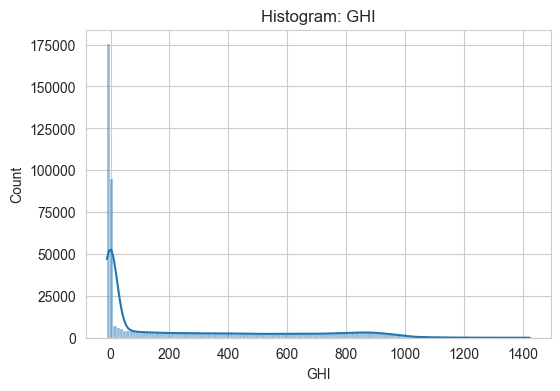

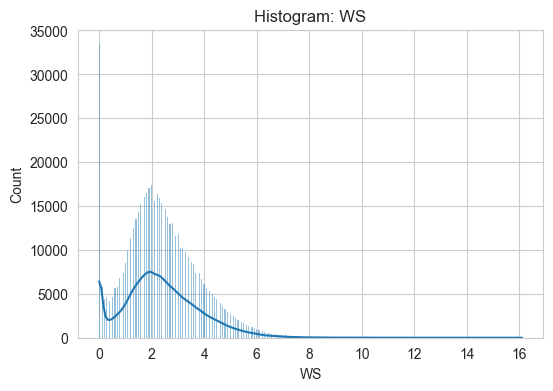

In [18]:
for col in ["GHI","WS"]:
    if col in clean.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(clean[col].dropna(), kde=True)
        plt.title(f"Histogram: {col}")
        plt.show()

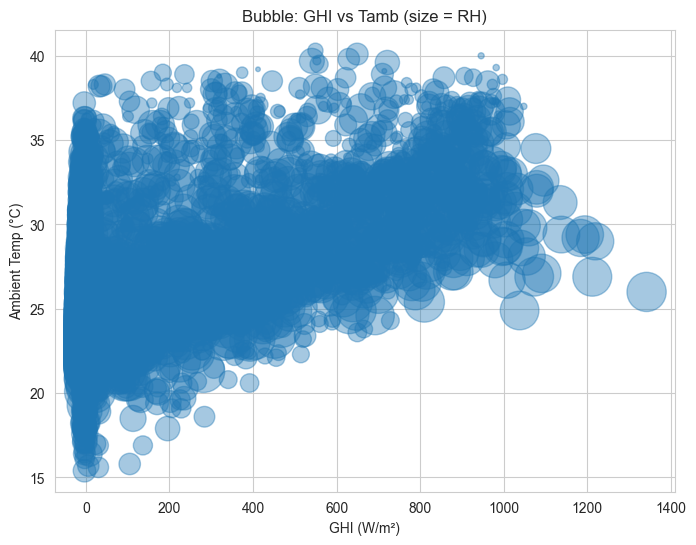

In [19]:
if all(c in clean.columns for c in ["GHI","Tamb","RH"]):
    sample = clean.dropna(subset=["GHI","Tamb","RH"])
    if len(sample) > 3000:
        sample = sample.sample(3000, random_state=0)
    plt.figure(figsize=(8,6))
    sizes = (sample["RH"] - sample["RH"].min() + 1) * 10
    plt.scatter(sample["GHI"], sample["Tamb"], s=sizes, alpha=0.4)
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Ambient Temp (°C)")
    plt.title("Bubble: GHI vs Tamb (size = RH)")
    plt.show()
else:
    print("GHI/Tamb/RH not present — skipping bubble chart.")